In [15]:
import pandas as pd
import numpy as np
df=pd.read_csv('smaller_adult.csv')
df.columns

Index(['age', 'workclass', 'educational-num', 'occupation', 'gender',
       'hours-per-week', 'income'],
      dtype='object')

In [16]:
df.isin(['?']).sum()

age                  0
workclass          214
educational-num      0
occupation         214
gender               0
hours-per-week       0
income               0
dtype: int64

In [17]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df.isin(['?']).sum()

age                0
workclass          0
educational-num    0
occupation         0
gender             0
hours-per-week     0
income             0
dtype: int64

In [18]:
df.dropna(how='any',inplace=True)
df.shape

(3360, 7)

In [19]:
df.duplicated().sum()

238

In [20]:
df=df.drop_duplicates()

In [21]:
df.shape

(3122, 7)

In [22]:
x=df.loc[:,['age', 'workclass', 'educational-num', 'occupation', 'gender',
       'hours-per-week']]
y=df.loc[:,['income']]

In [23]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)

C:\Users\ineel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
nf=x.select_dtypes('number')
cf=x.select_dtypes('object')

In [27]:
conv_cf=pd.get_dummies(cf)

In [28]:
all_fea=[conv_cf,nf]
newx=pd.concat(all_fea,axis=1,join='inner')

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
y_pred=model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7694770544290288


In [34]:
from sklearn.tree import plot_tree

In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.figure(figsize=(14,14))

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

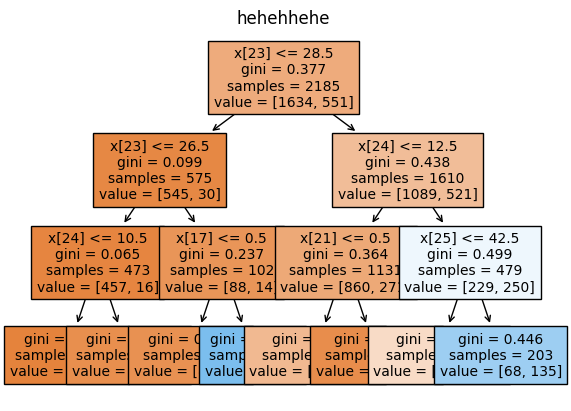

In [39]:
plot_tree(model,fontsize=10,filled=True)
plt.title('hehehhehe')
plt.show()